<a href="https://colab.research.google.com/github/sonali6062/Machine_learning_fundamentals/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions # Used to plot the decision boundaries

CREATING MANUAL DATASETS

In [2]:
df=pd.DataFrame()

In [3]:
df['Feature1']=[1,2,3,4,5,6,6,7,9,9]
df['Feature2']=[5,3,6,8,1,9,5,8,9,2]
df['Target']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,Feature1,Feature2,Target
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
df.shape

(10, 3)

RELATIONSHIP BETWEEN THE FEATURE INA GIVEN DATAFRAME(USING SCATTERPLOT)

<Axes: xlabel='Feature1', ylabel='Feature2'>

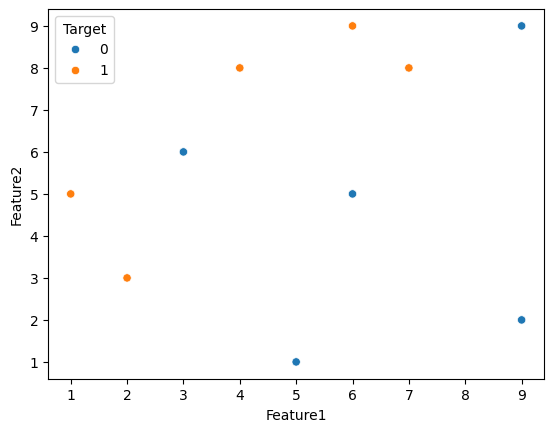

In [6]:
sns.scatterplot(x=df['Feature1'],y=df['Feature2'],hue=df['Target'])

WEIGHT INITIALIZATION(1/NUMBER OF RECORDS)

In [7]:
df['weights']=1/df.shape[0]#1/10

In [8]:
df

,Feature1,Feature2,Target,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


Training models

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1=DecisionTreeClassifier(max_depth=1)

SPLIT THE DATA IN INPUT FEATURE AND TARGET LABEL

In [11]:
x=df.iloc[:,0:2].values#input featuers
y=df.iloc[:,2].values#target label

In [12]:
x

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [6, 5],
       [7, 8],
       [9, 9],
       [9, 2]])

In [13]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0])

MODEL TRAING:M1

In [14]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

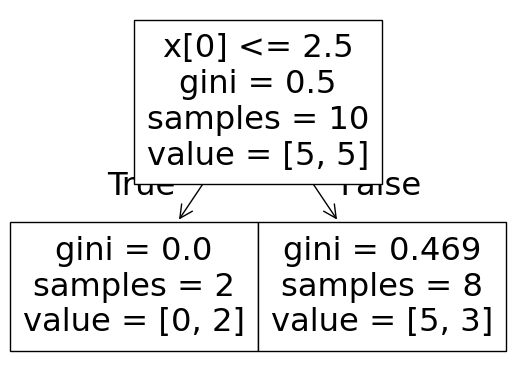

In [15]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

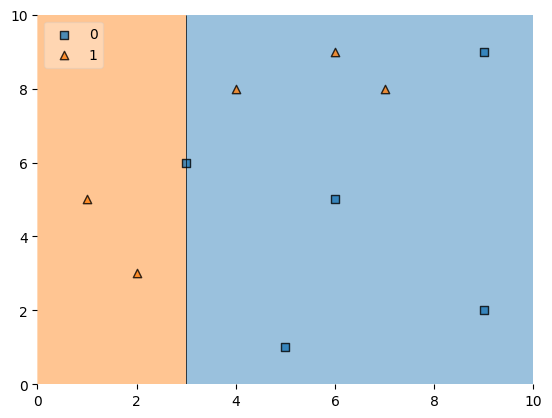

In [16]:
plot_decision_regions(x,y,clf=dt1,legend=2)

Blue points must belong ti blue region and orage points must belong to orange region.Remaining are misclassified points

In [17]:
df['y_pred']=dt1.predict(x)

In [18]:
df

,Feature1,Feature2,Target,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


EVALUATE ERROR:

In [19]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

CALCULATE MODEL WEIGHT(here 3 misclassified points: error=0.1+0.1+0.1)

In [20]:
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [21]:
#Update the weight of correctly classified points and  misclassified points
def update_row_weight(row,alpha=0.423):
  if row['Target']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha1)

In [22]:
df['updated_weight']=df.apply(update_row_weight,axis=1)

In [23]:
df

,Feature1,Feature2,Target,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [24]:
df['updated_weight'].sum()

np.float64(0.9168126126738484)

In [25]:
df['normalized_weights']=df['updated_weight']/df['updated_weight'].sum()

In [26]:
df

,Feature1,Feature2,Target,weights,y_pred,updated_weight,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071452
1,2,3,1,0.1,1,0.065508,0.071452
2,3,6,0,0.1,0,0.065508,0.071452
3,4,8,1,0.1,0,0.152753,0.166613
4,5,1,0,0.1,0,0.065508,0.071452
5,6,9,1,0.1,0,0.152753,0.166613
6,6,5,0,0.1,0,0.065508,0.071452
7,7,8,1,0.1,0,0.152753,0.166613
8,9,9,0,0.1,0,0.065508,0.071452
9,9,2,0,0.1,0,0.065508,0.071452


In [27]:
df['normalized_weights'].sum()

np.float64(1.0)

In [28]:
#lower and upper bound of the normalized weight(range)
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [29]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [30]:
df[['Feature1','Feature2','Target','weights','y_pred','updated_weight','normalized_weights','cumsum_lower','cumsum_upper']]

,Feature1,Feature2,Target,weights,y_pred,updated_weight,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071452,0.000000,0.071452
1,2,3,1,0.1,1,0.065508,0.071452,0.071452,0.142903
2,3,6,0,0.1,0,0.065508,0.071452,0.142903,0.214355
3,4,8,1,0.1,0,0.152753,0.166613,0.214355,0.380968
4,5,1,0,0.1,0,0.065508,0.071452,0.380968,0.452420
5,6,9,1,0.1,0,0.152753,0.166613,0.452420,0.619032
6,6,5,0,0.1,0,0.065508,0.071452,0.619032,0.690484
7,7,8,1,0.1,0,0.152753,0.166613,0.690484,0.857097
8,9,9,0,0.1,0,0.065508,0.071452,0.857097,0.928548
9,9,2,0,0.1,0,0.065508,0.071452,0.928548,1.000000


**ITERATION2:** Create a new training set

In [31]:
def create_new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

In [32]:
#upsampling(misclassified points indices:[3,5,7])
index_values=create_new_dataset(df)
index_values

[4, 7, 7, 2, 7, 3, 3, 5, 2, 4]

In [33]:
index_values=create_new_dataset(df)
index_values

[3, 1, 8, 3, 9, 6, 5, 9, 8, 3]

In [34]:
second_df=df.iloc[index_values,[0,1,2,3]]
second_df

,Feature1,Feature2,Target,weights
3,4,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
9,9,2,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1


In [35]:
dt2=DecisionTreeClassifier(max_depth=1)

In [36]:
dt2

DecisionTreeClassifier(max_depth=1)

In [37]:
x=second_df.iloc[:,0:2].values#input featuers
y=second_df.iloc[:,2].values#target label

In [38]:
x

array([[4, 8],
       [2, 3],
       [9, 9],
       [4, 8],
       [9, 2],
       [6, 5],
       [6, 9],
       [9, 2],
       [9, 9],
       [4, 8]])

In [39]:
y

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [40]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

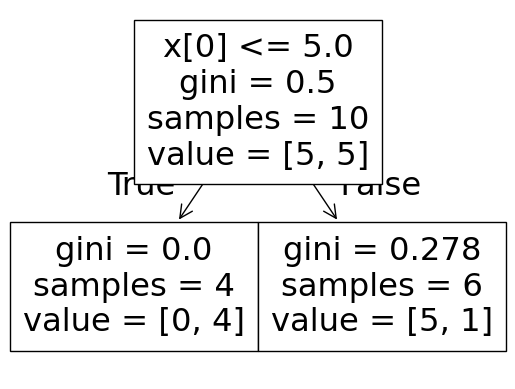

In [41]:
from sklearn.tree import plot_tree
plot_tree(dt2)

<Axes: >

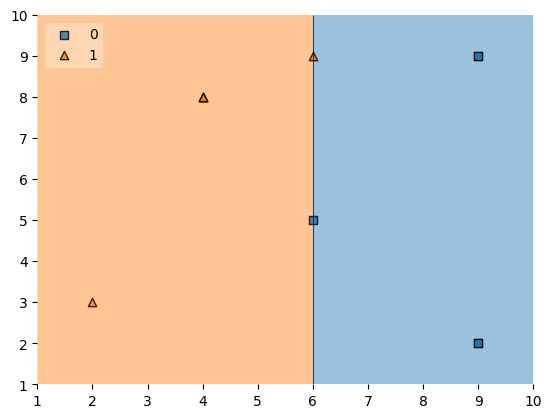

In [42]:
plot_decision_regions(x,y,clf=dt2,legend=2)

OBSERVATION-Only one data point misclassified

In [43]:
second_df['y_pred']=dt2.predict(x)

In [44]:
second_df

,Feature1,Feature2,Target,weights,y_pred
3,4,8,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
5,6,9,1,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1


Data point 8 is misclasssified.
So again find alpha

In [45]:
alpha2=calculate_model_weight(0.1)

In [46]:
alpha2

np.float64(1.0986122886681098)

In [47]:
#Update weights
def update_row_weight(row,alpha=1.09):
  if row['Target']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [48]:
second_df['updated_weight']=second_df.apply(update_row_weight,axis=1)

In [49]:
second_df

,Feature1,Feature2,Target,weights,y_pred,updated_weight
3,4,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
9,9,2,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622


In [50]:
second_df['normalised_weights']=second_df['updated_weight']/second_df['updated_weight'].sum()

In [51]:
second_df

,Feature1,Feature2,Target,weights,y_pred,updated_weight,normalised_weights
3,4,8,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
9,9,2,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034


In [52]:
second_df['normalised_weights'].sum()

np.float64(0.9999999999999999)

In [53]:
#lower and upper bound of the normalized weight(range)
second_df['cumsum_upper']=np.cumsum(second_df['normalised_weights'])

In [54]:
second_df['cumsum_lower']=second_df['cumsum_upper']-second_df['normalised_weights']

In [55]:
second_df[['Feature1','Feature2','Target','weights','y_pred','updated_weight','normalised_weights','cumsum_lower','cumsum_upper']]

,Feature1,Feature2,Target,weights,y_pred,updated_weight,normalised_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.033622,0.056034,0.000000,0.056034
1,2,3,1,0.1,1,0.033622,0.056034,0.056034,0.112068
8,9,9,0,0.1,0,0.033622,0.056034,0.112068,0.168102
3,4,8,1,0.1,1,0.033622,0.056034,0.168102,0.224136
9,9,2,0,0.1,0,0.033622,0.056034,0.224136,0.280170
6,6,5,0,0.1,0,0.033622,0.056034,0.280170,0.336204
5,6,9,1,0.1,0,0.297427,0.495694,0.336204,0.831898
9,9,2,0,0.1,0,0.033622,0.056034,0.831898,0.887932
8,9,9,0,0.1,0,0.033622,0.056034,0.887932,0.943966
3,4,8,1,0.1,1,0.033622,0.056034,0.943966,1.000000


ITERATION 3

In [56]:
def create_new_dataset(df2):
  indices=[]
  for i in range(df2.shape[0]):
    a=np.random.random()
    for index,row in df2.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices

In [57]:
index_values=create_new_dataset(second_df)
index_values

[5, 5, 9, 5, 1, 9, 8, 1, 5, 1]

In [58]:
third_df=second_df.iloc[index_values,[0,1,2,3]]
third_df

,Feature1,Feature2,Target,weights
6,6,5,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
1,2,3,1,0.1


In [59]:
dt3=DecisionTreeClassifier(max_depth=1)

In [60]:
dt3

DecisionTreeClassifier(max_depth=1)

In [61]:
x=third_df.iloc[:,0:2].values#input featuers
y=third_df.iloc[:,2].values#target label

In [62]:
x

array([[6, 5],
       [6, 5],
       [4, 8],
       [6, 5],
       [2, 3],
       [4, 8],
       [9, 9],
       [2, 3],
       [6, 5],
       [2, 3]])

In [63]:
y

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [64]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

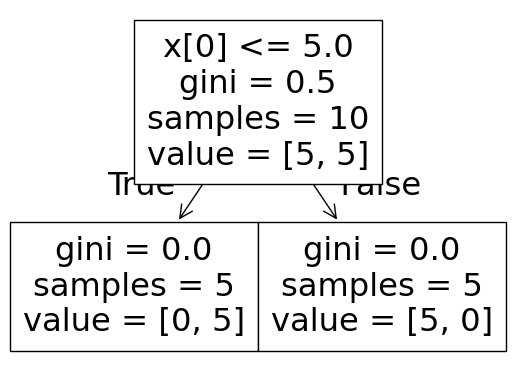

In [65]:
from sklearn.tree import plot_tree
plot_tree(dt3)

<Axes: >

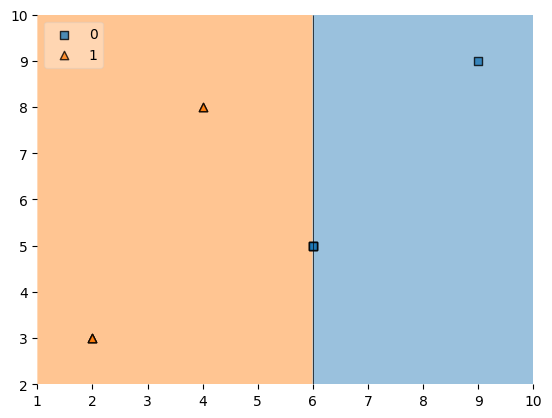

In [66]:
plot_decision_regions(x,y,clf=dt3,legend=2)

In [67]:
third_df['y_pred']=dt3.predict(x)

In [68]:
third_df

,Feature1,Feature2,Target,weights,y_pred
6,6,5,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
1,2,3,1,0.1,1
6,6,5,0,0.1,0
1,2,3,1,0.1,1


In [69]:
print(alpha1,alpha2)

0.42364893019360184 1.0986122886681098


OBSERVATION: In third iteration there is no misclassified_points

PREDICTIONS

In [70]:
df

,Feature1,Feature2,Target,weights,y_pred,updated_weight,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071452,0.071452,0.000000
1,2,3,1,0.1,1,0.065508,0.071452,0.142903,0.071452
2,3,6,0,0.1,0,0.065508,0.071452,0.214355,0.142903
3,4,8,1,0.1,0,0.152753,0.166613,0.380968,0.214355
4,5,1,0,0.1,0,0.065508,0.071452,0.452420,0.380968
5,6,9,1,0.1,0,0.152753,0.166613,0.619032,0.452420
6,6,5,0,0.1,0,0.065508,0.071452,0.690484,0.619032
7,7,8,1,0.1,0,0.152753,0.166613,0.857097,0.690484
8,9,9,0,0.1,0,0.065508,0.071452,0.928548,0.857097
9,9,2,0,0.1,0,0.065508,0.071452,1.000000,0.928548


In [71]:
query=np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [72]:
dt2.predict(query)

array([1])

In [73]:
dt3.predict(query)

array([1])

In [74]:
alpha1

np.float64(0.42364893019360184)

In [75]:
alpha1*1+alpha2*1

np.float64(1.5222612188617117)

In [76]:
np.sign(1.52)

np.float64(1.0)

Result:Sign is 1 that states that the target is 1. It's true

In [77]:
query=np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [78]:
dt2.predict(query)

array([0])

In [79]:
dt3.predict(query)

array([0])

In [80]:
alpha1*1+alpha2*-1

np.float64(-0.674963358474508)

In [81]:
np.sign(-0.67)

np.float64(-1.0)

RESULT: Sign is -1 that states the target is 0. It's true